In [44]:
%load_ext lab_black
import matplotlib.pyplot as plt
from matplotlib import ticker as 
from niddk_covid_sicr.analysis import get_top_n
import pandas as pd
from pathlib import Path
import re
import seaborn as sns

sns.set_style("ticks")
plt.rcParams["font.size"] = 14
# plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [4]:
top_25 = get_top_n("../data", n=26, last_date="2020/05/31")
top_25.remove("US")

In [5]:
def load_table(path):
    path = Path("../../covid-fits/%s" % path)
    df = pd.read_csv(path / "fit_table_reweighted.csv")
    df = df.set_index(["roi", "quantile"])
    return df


def bar_graph_feature(df, feature, log=False):
    rois = ["AA_Global"] + top_25
    df = df.reorder_levels([1, 0])
    means = df.loc[("mean", rois), feature]["mean"]
    stds = df.loc[("std", rois), feature]["std"]
    ranked = means.sort_values(ascending=False).index
    ranked = [x for x in ranked if x != "AA_Global"] + ["AA_Global"]
    plt.barh(ranked, means.loc[ranked].values, xerr=stds.loc[ranked].values)
    plt.gca().set_yticklabels([x if x != "AA_Global" else "Global" for x in ranked])
    plt.xlabel(feature)
    plt.ylim(0.5, len(rois) - 0.5)
    plt.gca().get_yticklabels()[-1].set_weight("bold")


def sort_nicely(l):
    """ Sorts the given iterable in the way that is expected.
 
    Required arguments:
    l -- The iterable to be sorted.
    """
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split("([0-9]+)", key)]
    return sorted(l, key=alphanum_key)


def get_week(s):
    return int(re.search("[0-9]+", s)[0])


fit13 = load_table("tables-fit13")
fit14 = load_table("tables-fit14")

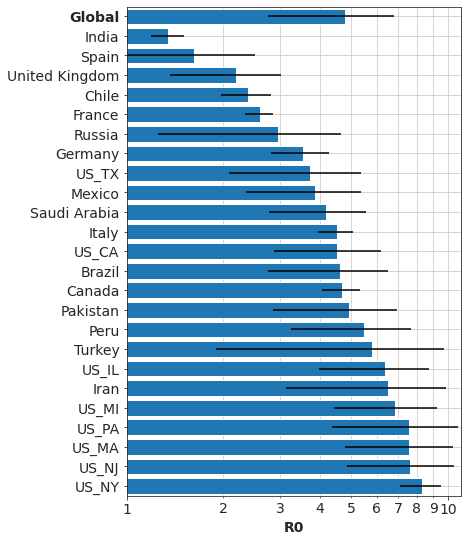

In [51]:
# R0
sns.set_style("ticks")
plt.figure(figsize=(6, 9))
bar_graph_feature(fit13, "R0", log=False)

plt.grid(True, which="both")
plt.gca().xaxis.set_minor_locator(tkr.LogLocator(base=10, subs="all"))
plt.xlim(1, 11)
plt.xscale("log")
plt.tick_params(axis="x", which="minor")

plt.gca().xaxis.set_major_formatter(tkr.FormatStrFormatter("%d"))
plt.gca().xaxis.set_minor_formatter(tkr.FormatStrFormatter("%d"))

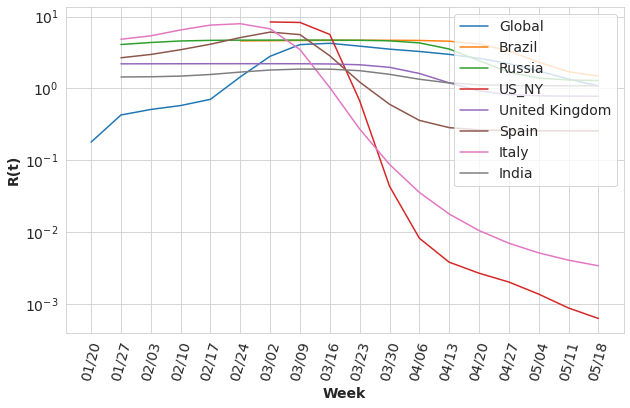

In [43]:
# Rt
sns.set_style("whitegrid")
from datetime import datetime, timedelta


def line_graph_feature(df, feature, limit=None):
    rois = ["AA_Global"] + top_25
    if limit:
        rois = rois[:limit]
    df = df.reorder_levels([1, 0])
    features = [col for col in df if feature in col]
    features = sort_nicely(features)
    weeks = [get_week(f) for f in features]
    means = df.loc[("mean", rois), features].loc["mean"]
    stds = df.loc[("std", rois), features].loc["std"]
    # ranked = means.sort_values(ascending=False).index
    # ranked = [x for x in ranked if x != "AA_Global"] + ["AA_Global"]
    # plt.barh(ranked, means.loc[ranked].values, xerr=stds.loc[ranked].values)
    for roi in rois:
        plt.plot(weeks, means.loc[roi], label="Global" if roi == "AA_Global" else roi)
    # plt.gca().set_yticklabels([x if x != "AA_Global" else "Global" for x in ranked])
    # plt.xlabel(feature)
    # plt.ylim(0.5, len(rois) - 0.5)
    # plt.gca().get_yticklabels()[-1].set_weight("bold")
    plt.legend(loc=1)
    dates = [
        datetime.strptime("2020/01/20", "%Y/%m/%d") + timedelta(0, 24 * 3600 * 7 * x)
        for x in range(18)
    ]
    date_labels = [datetime.strftime(x, "%m/%d") for x in dates]
    plt.xticks(range(18), date_labels, rotation=75)
    plt.xlabel("Week")
    plt.ylabel("R(t)")


plt.figure(figsize=(10, 6))
line_graph_feature(fit14, "Rt", limit=8)
plt.yscale("log")

### Compare across models

In [113]:
df = pd.read_csv("../../covid-fits/tables-fit13/fit_table_raw.csv")

In [116]:
roi = "United Kingdom"
features = [col for col in df if "Rt" in col]
features = sort_nicely(features)
df[(df["roi"] == roi) & (df["quantile"] == "mean")].set_index("model")[
    features
].round(1)

,Rt (week 0),Rt (week 1),Rt (week 2),Rt (week 3),Rt (week 4),Rt (week 5),Rt (week 6),Rt (week 7),Rt (week 8),Rt (week 9),Rt (week 10),Rt (week 11),Rt (week 12),Rt (week 13),Rt (week 14),Rt (week 15),Rt (week 16),Rt (week 17),Rt-by-week
model,,,,,,,,,,,,,,,,,,,
SICRLM,NaN,2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.1,1.9,1.6,1.2,0.9,0.8,0.8,0.8,0.8,NaN
SICRLM2R,NaN,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.1,1.9,1.6,1.2,1.0,0.9,0.9,0.9,0.9,NaN
SICRLMQ,NaN,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.0,1.6,1.2,0.9,0.8,0.8,0.8,0.8,NaN
SICRLMQ2R,NaN,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.4,2.2,1.7,1.3,1.0,0.9,0.9,0.9,0.9,NaN
SICRLMQC,NaN,3.1,3.3,3.5,3.7,3.8,3.9,3.9,3.8,3.4,2.6,1.7,1.1,0.8,0.7,0.7,0.7,0.7,NaN
SICRLMQC2R,NaN,3.8,4.0,4.1,4.3,4.3,4.4,4.3,4.2,3.7,2.8,1.8,1.2,1.0,0.9,0.9,0.9,0.9,NaN
SICRM,NaN,3.4,3.3,3.2,3.2,3.2,3.2,3.2,3.1,2.7,2.1,1.5,1.0,0.7,0.5,0.4,0.3,0.3,NaN
SICRM2R,NaN,3.7,3.5,3.4,3.3,3.3,3.3,3.2,3.1,2.8,2.3,1.6,1.1,0.8,0.6,0.5,0.4,0.4,NaN
SICRMQ,NaN,3.2,3.1,2.7,2.0,1.4,1.1,0.9,0.9,0.8,0.6,0.5,0.3,0.2,0.2,0.2,0.2,0.2,NaN


Text(0, 0.5, 'WAIC')

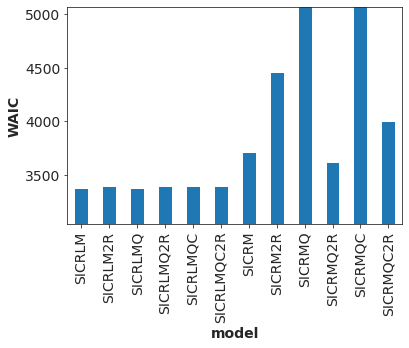

In [128]:
z = df[(df["roi"] == "United Kingdom") & (df["quantile"] == "mean")].set_index("model")[
    "waic"
]
z.plot.bar()
plt.ylim(z.min() * 0.9, z.min() * 1.5)
plt.ylabel("WAIC")